## Lession 5 Feature Engineering

In [1]:
import numpy as np
import pandas as pd

In [2]:
# inputs and corresponding outputs (targets)
x = np.array([67,67,72,69,69,70,67,67,66,68])
y = np.array([128,123,129,143,132,142,112,118,108,119])

In [3]:
df_test = pd.read_csv('../data/height_weight.csv', sep=',')
df_test.head(5)

,height,weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [4]:
df_test.shape

(25000, 2)

In [5]:
df_train = pd.DataFrame()
df_train['height'] = x
# df_train['height2'] = x**2
df_train['height3'] = x**3
df_train['weight'] = y
df_train['bias'] = 1
df_train.head(3)

,height,height3,weight,bias
0,67,300763,128,1
1,67,300763,123,1
2,72,373248,129,1


In [6]:
df_test['height'] = df_test.height
# df_test['height2'] = df_test.height**2
df_test['height3'] = df_test.height**3
df_test['bias'] = 1
df_test.head(3)

,height,weight,height3,bias
0,65.78331,112.9925,284673.581908,1
1,71.51521,136.4873,365759.196594,1
2,69.39874,153.0269,334237.178490,1


In [7]:
X_train = df_train.drop('weight', axis=1).values
X_test  = df_test.drop('weight', axis=1).values
y_train = df_train['weight'].values
y_test  = df_test['weight'].values

In [8]:
A = np.matmul(X_train.T, X_train)
b = np.matmul(X_train.T, y_train)
wopt = np.linalg.solve(A, b)
yh_train = np.matmul(X_train, wopt)
yh_test  = np.matmul(X_test, wopt)

In [9]:
def RMSE(yh, y):
    return np.sqrt((((yh-y)**2).mean()))

In [10]:
print('training RMSE ', RMSE(yh_train, y_train))
print('testing  RMSE ', RMSE(yh_test, y_test))

training RMSE  5.86353315077273
testing  RMSE  17.009351787848455


In [11]:
y_train.std()

11.101351269102334

In [48]:
y_test.std()

11.660664343320782

## Plot fitted curves

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
w1 = np.array([   4.2972973 , -167.67567568])
w2 = np.array([  2.61153252e+02  ,-1.86273429e+00 , -9.01571389e+03])
w3 = np.array([ -5.86315169e+03  , 8.68981506e+01 , -4.28604785e-01  , 1.31772117e+05])
xo = np.linspace(x.min(),x.max(),101)
XX = np.ones((101,4))
XX[:,0] = xo
XX[:,1] = xo*xo
XX[:,2] = xo*xo*xo
yh3 = np.matmul(XX,w3)

Text(0,0.5,'weight')

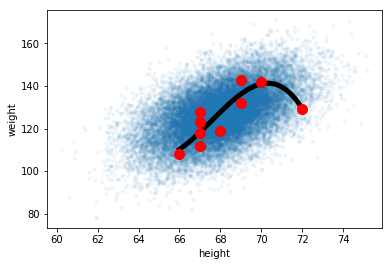

In [25]:
plt.plot(df_test['height'],df_test['weight'],'.',alpha=0.05)
plt.plot(xo,yh3,linewidth=5,color='black')
plt.plot(x,y,'.',markersize=20,color='red')
plt.xlabel('height')
plt.ylabel('weight')